<a href="https://colab.research.google.com/github/gabrieldimas/periapical-photo-caries-detection-using-cnn/blob/main/caries_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="qGaBcdFPu8o5nVzk6TVH")
project = rf.workspace("gabriels").project("tooth-segmentation-ra8um")
model = project.version(3).model

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

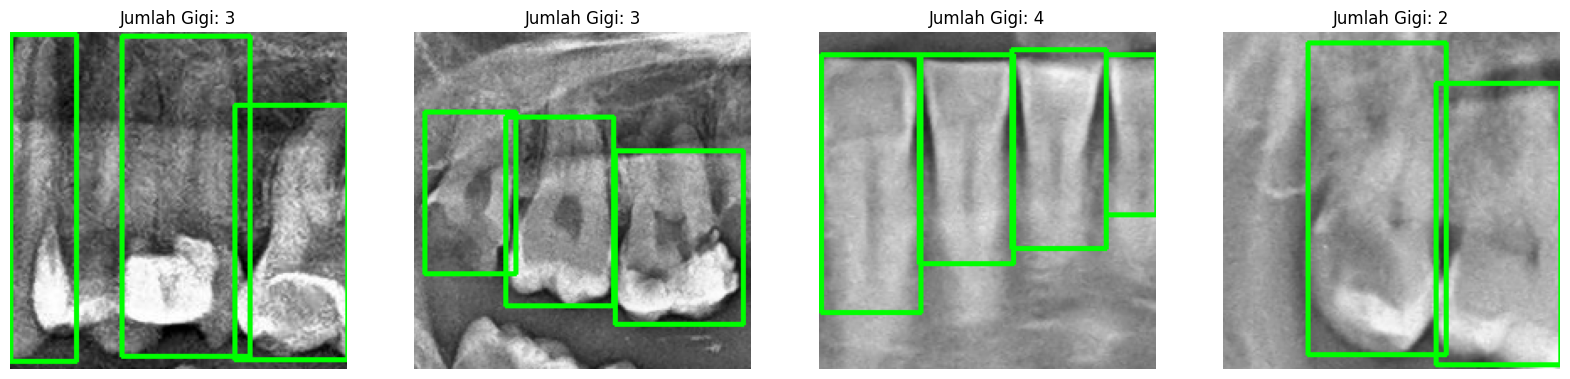

In [ ]:
image_folder = '/content/drive/MyDrive/dataset/caries-detection/periapical'

segmented_images = []

for filename in os.listdir(image_folder):
  image_path = os.path.join(image_folder, filename)
  result = model.predict(image_path)
  image = Image.open(image_path)

  image_np = np.array(image)
  image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
  num_teeth = len(result.json()['predictions'])

  for box in result.json()['predictions']:
      x1 = int(box['x'] - box['width'] / 2)
      y1 = int(box['y'] - box['height'] / 2)
      x2 = int(box['x'] + box['width'] / 2)
      y2 = int(box['y'] + box['height'] / 2)
      cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)

  segmented_images.append((image_cv, num_teeth))

selected_images = random.sample(segmented_images, 4)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (image_cv, num_teeth) in enumerate(selected_images):
    axes[i].imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Jumlah Gigi: {num_teeth}")
    axes[i].axis('off')

plt.show()

In [ ]:
save_folder = '/content/drive/MyDrive/dataset/caries-detection/segmented_tooth'
os.makedirs(save_folder, exist_ok=True)

tooth_count = 0

for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)
    result = model.predict(image_path)
    image = Image.open(image_path)

    image_np = np.array(image)
    image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    for i, box in enumerate(result.json()['predictions']):
        x1 = int(box['x'] - box['width'] / 2)
        y1 = int(box['y'] - box['height'] / 2)
        x2 = int(box['x'] + box['width'] / 2)
        y2 = int(box['y'] + box['height'] / 2)

        tooth_image = image_cv[y1:y2, x1:x2]

        resized_tooth = cv2.resize(tooth_image, (128, 128))

        save_path = os.path.join(save_folder, f"{filename[:-4]}_tooth_{i}.jpg")
        cv2.imwrite(save_path, resized_tooth)

        tooth_count += 1

print(f"Total teeth saved: {tooth_count}")

Total teeth saved: 740


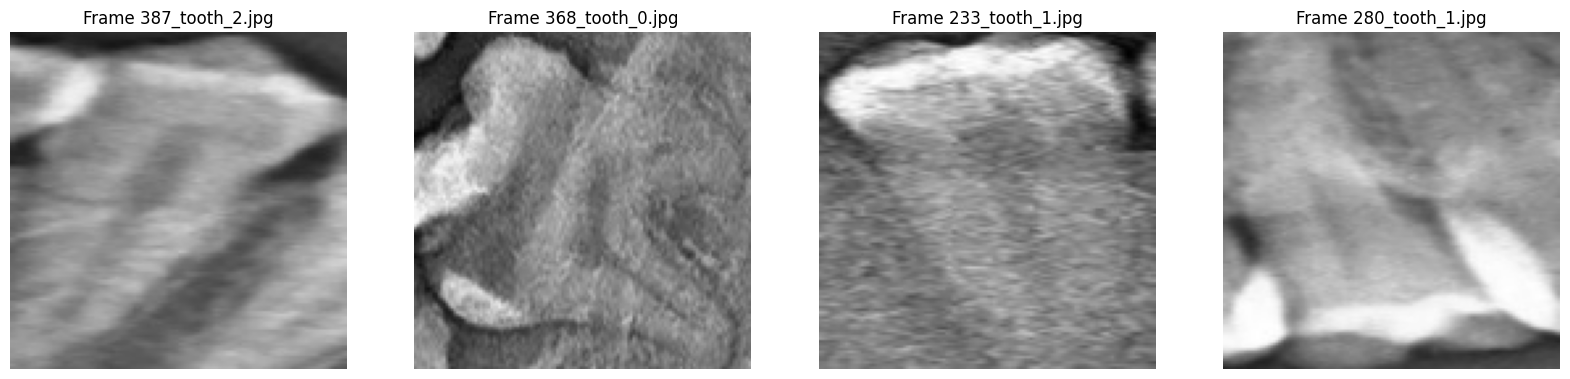

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

image_folder = '/content/drive/MyDrive/dataset/caries-detection/segmented_tooth'
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

selected_images = random.sample(image_files, 4)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, image_file in enumerate(selected_images):
  image_path = os.path.join(image_folder, image_file)
  img = mpimg.imread(image_path)
  axes[i].imshow(img)
  axes[i].set_title(image_file)
  axes[i].axis('off')

plt.show()

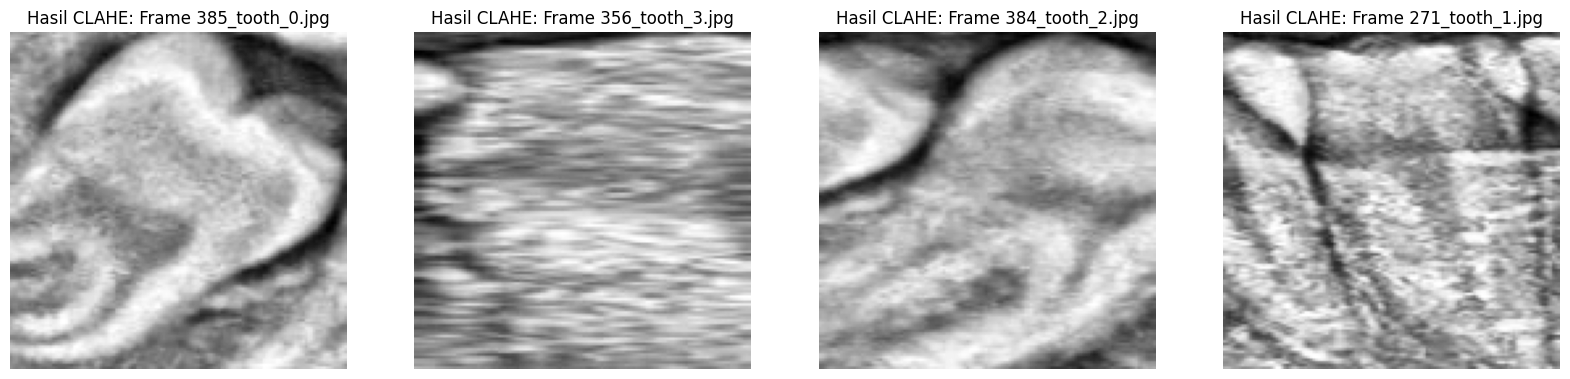

In [ ]:
image_folder = '/content/drive/MyDrive/dataset/caries-detection/segmented_tooth'
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

selected_images = random.sample(image_files, 4)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

for i, image_file in enumerate(selected_images):
    img_path = os.path.join(image_folder, image_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    equ = clahe.apply(img)

    axes[i].imshow(equ, cmap='gray')
    axes[i].set_title(f"Hasil CLAHE: {image_file}")
    axes[i].axis('off')

plt.show()

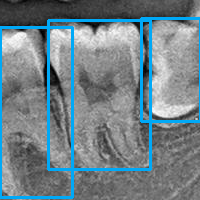

In [ ]:
image_path = '/content/drive/MyDrive/dataset/caries-detection/periapical/Frame 274.jpg'
result = model.predict(image_path)

from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = Image.open(image_path)
image_np = np.array(image)
image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

for box in result.json()['predictions']:
    x1 = int(box['x'] - box['width'] / 2)
    y1 = int(box['y'] - box['height'] / 2)
    x2 = int(box['x'] + box['width'] / 2)
    y2 = int(box['y'] + box['height'] / 2)

    cv2.rectangle(image_cv, (x1, y1), (x2, y2), (247, 169, 0), 2)

cv2_imshow(image_cv)

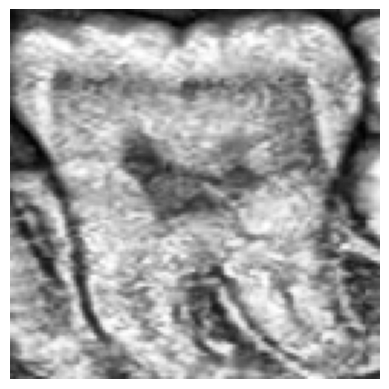

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/dataset/caries-detection/segmented_tooth/Frame 274_tooth_0.jpg'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

equ = clahe.apply(img)

plt.imshow(equ, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
import warnings
from sklearn.exceptions import UndefinedMetricWarning

In [ ]:
train_dir = '/content/drive/MyDrive/dataset/caries-detection/segmented_tooth/training'
test_dir = '/content/drive/MyDrive/dataset/caries-detection/segmented_tooth/test'

In [ ]:
train_caries_count = len(os.listdir(os.path.join(train_dir, 'caries')))
train_no_caries_count = len(os.listdir(os.path.join(train_dir, 'noncaries')))
test_caries_count = len(os.listdir(os.path.join(test_dir, 'caries')))
test_no_caries_count = len(os.listdir(os.path.join(test_dir, 'noncaries')))

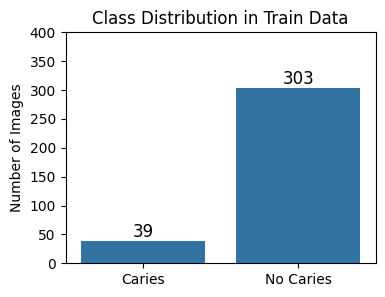

In [ ]:
plt.figure(figsize=(4, 3))
sns.barplot(x=['Caries', 'No Caries'], y=[train_caries_count, train_no_caries_count])
plt.title('Class Distribution in Train Data')
plt.ylabel('Number of Images')
plt.ylim(0, 400)

for i, count in enumerate([train_caries_count, train_no_caries_count]):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

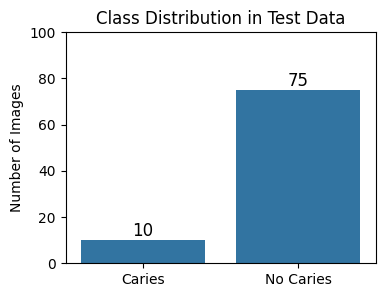

In [ ]:
plt.figure(figsize=(4, 3))
sns.barplot(x=['Caries', 'No Caries'], y=[test_caries_count, test_no_caries_count])
plt.title('Class Distribution in Test Data')
plt.ylabel('Number of Images')
plt.ylim(0, 100)

for i, count in enumerate([test_caries_count, test_no_caries_count]):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

(array([  34206.,   40977.,   60192.,   88521.,  119625.,  156111.,
         199047.,  264693.,  316659.,  344907.,  466506.,  439038.,
         492135.,  577770.,  657978.,  785430.,  929565., 1076652.,
        1242225., 1409949., 1887462., 1771206., 1935297., 2078181.,
        2191743., 2317608., 2378199., 2388714., 2281332., 2143668.,
        2347824., 1768359., 1582287., 1402989., 1193706., 1024773.,
         865095.,  727017.,  572610.,  475050.,  455571.,  295305.,
         261789.,  237696.,  228450.,  232146.,  256095.,  286947.,
         219585.,  101094.]),
 array([  0.        ,   5.0999999 ,  10.19999981,  15.30000019,
         20.39999962,  25.5       ,  30.60000038,  35.70000076,
         40.79999924,  45.90000153,  51.        ,  56.09999847,
         61.20000076,  66.30000305,  71.40000153,  76.5       ,
         81.59999847,  86.69999695,  91.80000305,  96.90000153,
        102.        , 107.09999847, 112.19999695, 117.30000305,
        122.40000153, 127.5       , 132.60

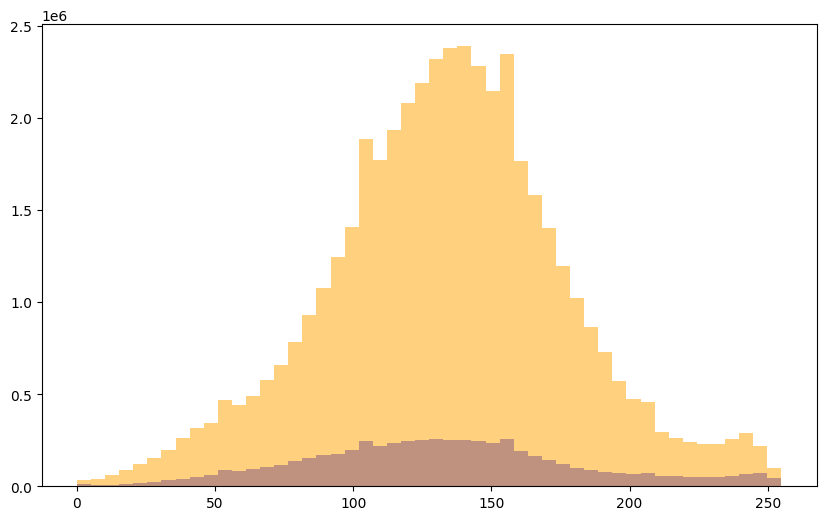

In [ ]:
target_size = (224, 224)

caries_image_paths = [os.path.join(train_dir, 'caries', filename) for filename in os.listdir(os.path.join(train_dir, 'caries'))]
caries_images = []
for img_path in caries_image_paths:
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    caries_images.append(img_array)
caries_images = np.array(caries_images)

no_caries_image_paths = [os.path.join(train_dir, 'noncaries', filename) for filename in os.listdir(os.path.join(train_dir, 'noncaries'))]
no_caries_images = []
for img_path in no_caries_image_paths:
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    no_caries_images.append(img_array)
no_caries_images = np.array(no_caries_images)

plt.figure(figsize=(10, 6))
plt.hist(caries_images.flatten(), bins=50, color='blue', alpha=0.5, label='Caries')
plt.hist(no_caries_images.flatten(), bins=50, color='orange', alpha=0.5, label='No Caries')

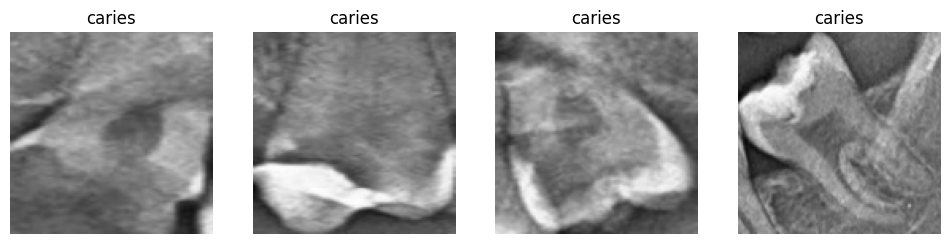

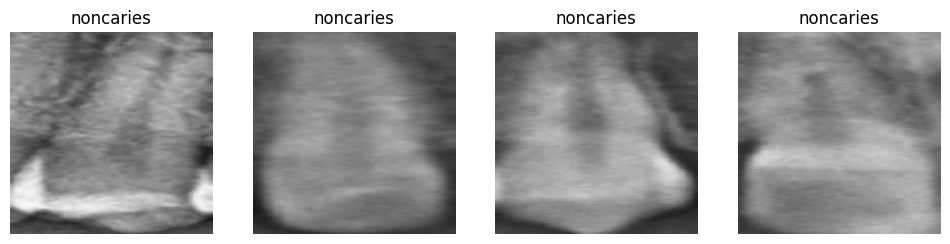

In [ ]:
def display_samples(class_name, directory):
    plt.figure(figsize=(12, 6))
    for i in range(4):
        image_path = os.path.join(directory, class_name, os.listdir(os.path.join(directory, class_name))[i])
        img = Image.open(image_path)
        plt.subplot(1, 4, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

display_samples('caries', train_dir)
display_samples('noncaries', train_dir)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 275 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // validation_generator.batch_size
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8324 - loss: 4.9927 - val_accuracy: 0.8824 - val_loss: 3.7610
Epoch 2/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8750 - loss: 3.7672

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8750 - loss: 3.7672 - val_accuracy: 0.8824 - val_loss: 4.3275
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8752 - loss: 3.0637 - val_accuracy: 0.8824 - val_loss: 1.4919
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8438 - loss: 1.4860 - val_accuracy: 0.8824 - val_loss: 1.3527
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7786 - loss: 1.4419 - val_accuracy: 0.8824 - val_loss: 1.2044
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9375 - loss: 1.0474 - val_accuracy: 0.8824 - val_loss: 1.1829
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 798ms/step - accuracy: 0.8727 - loss: 1.0655 - val_accuracy: 0.8824 - val_loss: 0.9899
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9375 - loss: 0.7470 - val_accuracy: 0.8824 - val_loss: 0.9712
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8961 - loss: 0.8305 - val_accuracy: 0.8824 - val_loss: 0.8546
Epoch 10/10


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.1176 - loss: 3.3014
Test accuracy: 0.12


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
       train_dir,
       target_size=(128, 128),
       batch_size=32,
       class_mode='binary',
       subset='training'
   )

train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 128, 128, 3], [None, 1])  # Adjust shapes if needed
)

train_dataset = train_dataset.repeat()


test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 275 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7934 - loss: 3.9157 - val_accuracy: 0.8824 - val_loss: 2.0848
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8123 - loss: 2.0815 - val_accuracy: 0.8824 - val_loss: 1.1891
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 851ms/step - accuracy: 0.8892 - loss: 1.0888 - val_accuracy: 0.8824 - val_loss: 0.9412
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8851 - loss: 0.8764 - val_accuracy: 0.8824 - val_loss: 0.7752
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 883ms/step - accuracy: 0.8913 - loss: 0.6647 - val_accuracy: 0.8824 - val_loss: 0.6343
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.8824 - loss: 0.6340
Test accuracy: 0.88


In [ ]:
predictions = model.predict(test_generator)
y_pred = np.round(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


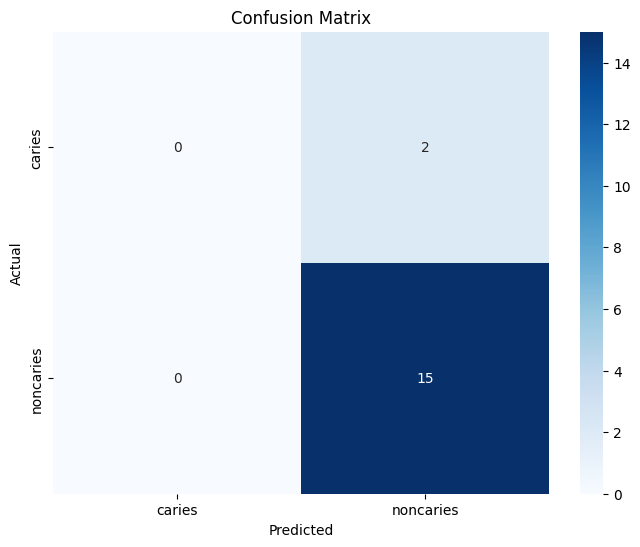

              precision    recall  f1-score   support

      caries       0.00      0.00      0.00         2
   noncaries       0.88      1.00      0.94        15

    accuracy                           0.88        17
   macro avg       0.44      0.50      0.47        17
weighted avg       0.78      0.88      0.83        17



In [ ]:
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

conf_matrix = confusion_matrix(test_generator.classes, y_pred)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(test_generator.classes, y_pred, target_names=class_names))

warnings.filterwarnings("default", category=UndefinedMetricWarning)

Text(0.5, 1.0, 'Training and Validation Accuracy')

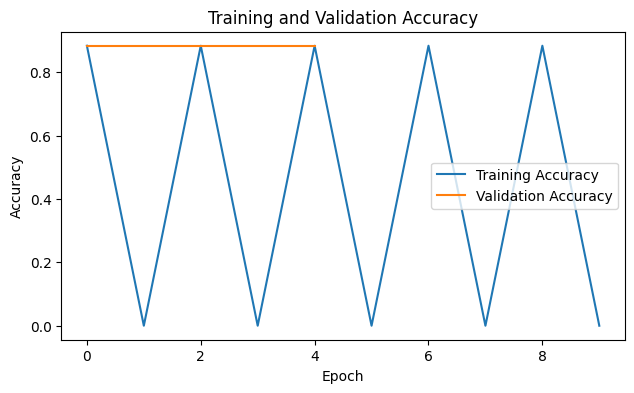

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

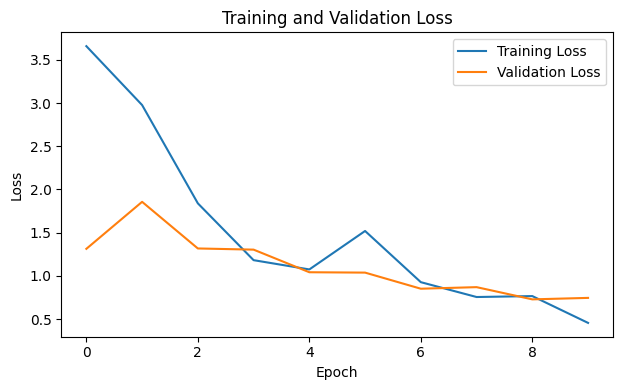

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()

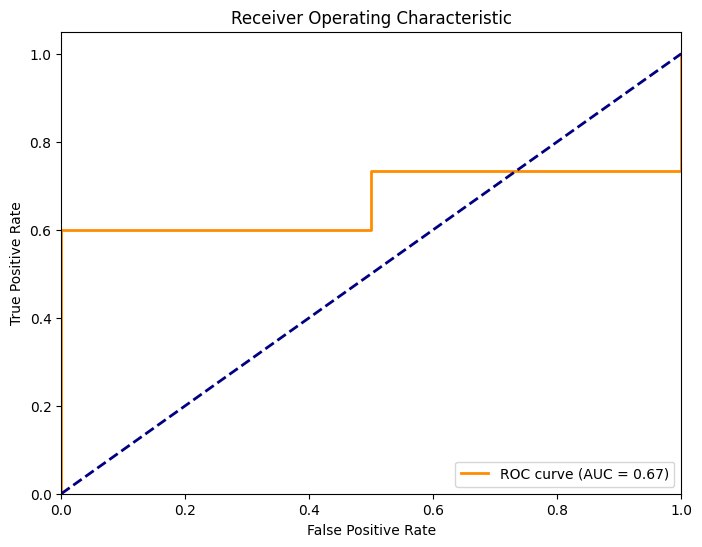

In [ ]:
fpr, tpr, thresholds = roc_curve(test_generator.classes, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


<ipython-input-58-4d83dcab2ce5>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {class_names[int(true_labels[i])]}, Predicted: {class_names[int(predicted_labels[i])]}")


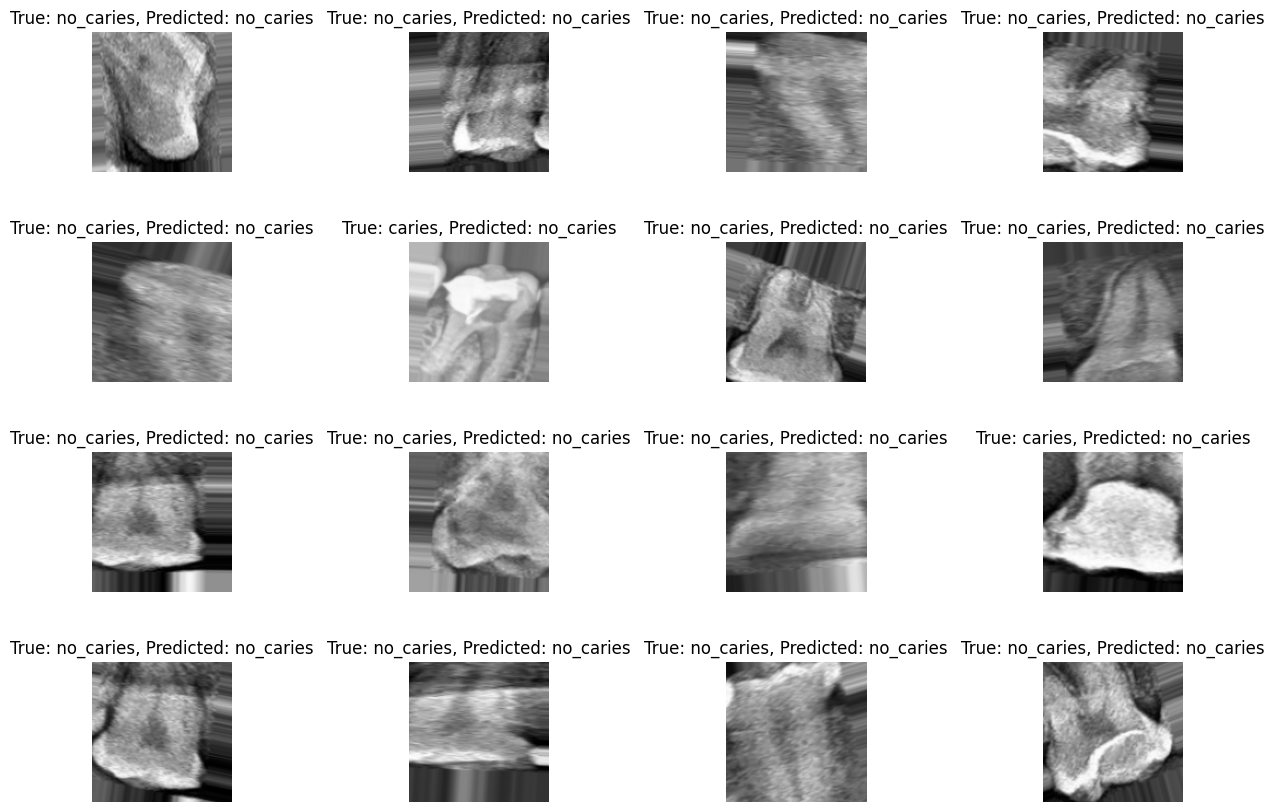

In [ ]:
num_images_to_predict = 16
test_images, true_labels = next(test_generator)

predicted_labels = model.predict(test_images)

predicted_labels = np.round(predicted_labels)

class_names = ['caries', 'no_caries']

num_rows = 4
num_cols = (num_images_to_predict + num_rows - 1) // num_rows

plt.figure(figsize=(15, 10))
for i in range(num_images_to_predict):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[int(true_labels[i])]}, Predicted: {class_names[int(predicted_labels[i])]}")
    plt.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()